In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import os

In [3]:
eng_df = pd.read_csv("../../data/transfers/cleaned/england_joined.csv")
italy_df = pd.read_csv("../../data/transfers/cleaned/italy_joined.csv")
spain_df = pd.read_csv("../../data/transfers/cleaned/spain_joined.csv")

In [4]:
spain_df = spain_df.fillna(0)
italy_df= italy_df.fillna(0)
eng_df = eng_df.fillna(0)

In [5]:
list_dfs = [eng_df,spain_df,italy_df]

In [6]:
# Calculating R-square for each league and financial variable
def r_square(list_dfs, col1, col2):
    leagues = ["Premier league","Liga", "Serie A"]
    for league, df in zip(leagues, list_dfs):
        name = league
        normalised = df[col2]/max(df[col2])
        r = stats.pearsonr(df[col1],normalised)[0]
        r_2 = round(r**2,3)
        print(f"When considering {col1} vs {col2}, The R-Square of {name} is {r_2}")

In [7]:
r_square(list_dfs,"Ranking","MA")

When considering Ranking vs MA, The R-Square of Premier league is 0.455
When considering Ranking vs MA, The R-Square of Liga is 0.36
When considering Ranking vs MA, The R-Square of Serie A is 0.353


In [8]:
r_square(list_dfs,"Ranking","avg player wage")

When considering Ranking vs avg player wage, The R-Square of Premier league is 0.456
When considering Ranking vs avg player wage, The R-Square of Liga is 0.271
When considering Ranking vs avg player wage, The R-Square of Serie A is 0.361


In [9]:
r_square(list_dfs,"Ranking","Transfer Spend (Euros)")

When considering Ranking vs Transfer Spend (Euros), The R-Square of Premier league is 0.212
When considering Ranking vs Transfer Spend (Euros), The R-Square of Liga is 0.261
When considering Ranking vs Transfer Spend (Euros), The R-Square of Serie A is 0.329


In [10]:
r_square(list_dfs,"Ranking","avg player value (EU)")

When considering Ranking vs avg player value (EU), The R-Square of Premier league is 0.527
When considering Ranking vs avg player value (EU), The R-Square of Liga is 0.34
When considering Ranking vs avg player value (EU), The R-Square of Serie A is 0.38


In [11]:
# This function creates a summary Df comparing the Top 4 Teams and the League for the average of a given variable.
def compare_average(df,column):
    
    years = eng_df["Year"].unique().tolist()
    
    league_average = []
    
    for year in years:
        filtered_df = df[df["Year"]==year]
        average = round(filtered_df[column].mean(),2)
        league_average.append(average)
    result = {years[i]: league_average[i] for i in range(len(years))} 

    league_df = pd.DataFrame.from_dict(result, orient = "index").reset_index()
    league_df = league_df.rename(columns={0:f"League Avg: {column}","index":"Year"})

    top4_average = []
    
    for year in years:
        filtered_df_2 = df[(df["Year"]==year) & (df["Ranking"]<5)]
        average = round(filtered_df_2[column].mean(),2)
        top4_average.append(average)

    result_2 = {years[i]: top4_average[i] for i in range(len(years))} 
    top4_df = pd.DataFrame.from_dict(result_2, orient = "index").reset_index()
    top4_df = top4_df.rename(columns={0:f"Top 4 Avg: {column}","index":"Year"})
    combined_df = pd.merge(league_df,top4_df,on=["Year"])
    return combined_df

In [12]:
# Applying the function to create dataframes for each league and the 3yr Moving Average.
# Moving Average (MA) has been selected to investigate further as it has the highest r-value.

# Premier League
eng_MA = compare_average(eng_df,"MA")
eng_MA["Difference"] = eng_MA["Top 4 Avg: MA"]-eng_MA["League Avg: MA"]
# Serie A
italy_MA = compare_average(italy_df,"MA")
italy_MA["Difference"] = italy_MA["Top 4 Avg: MA"]-italy_MA["League Avg: MA"]
# La Liga
spain_MA = compare_average(spain_df,"MA")
spain_MA["Difference"] = spain_MA["Top 4 Avg: MA"]-spain_MA["League Avg: MA"]

In [13]:
italy_MA

,Year,League Avg: MA,Top 4 Avg: MA,Difference
0,2019,47.90,81.60,33.70
1,2018,42.51,82.54,40.03
2,2017,35.26,82.70,47.44
3,2016,27.30,53.92,26.62
4,2015,21.73,51.04,29.31


In [14]:
spain_MA

,Year,League Avg: MA,Top 4 Avg: MA,Difference
0,2019,45.56,163.97,118.41
1,2018,32.88,107.72,74.84
2,2017,27.30,78.17,50.87
3,2016,23.12,66.73,43.61
4,2015,22.09,66.59,44.50


In [18]:
# This function takes the summary dataframe created above and turns it into a comparative bar chart.
def bar_compare(df, league):

    ind = np.arange(5)
    width = 0.35

    fig, ax = plt.subplots()

    rects1 = ax.bar(ind, df["Top 4 Avg: MA"], width, color='royalblue')
    rects2 = ax.bar(ind + width, df["League Avg: MA"], width, color='seagreen')

    ax.set_ylabel('3 Yr MA Spend (M Euros)')
    ax.set_title(league, fontweight = "bold", fontsize = "14")
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels( ('2019', '2018', '2017', '2016', '2015') )

    ax.legend( (rects1[0], rects2[0]), ('Top 4', 'League') )
    
    #path = "transfers_output/"
    #filename = f"{league}_bar.png"
    #f = open(path+filename,"w")
    #f.close()
    #plt.savefig(path+filename)
    
    plt.show()


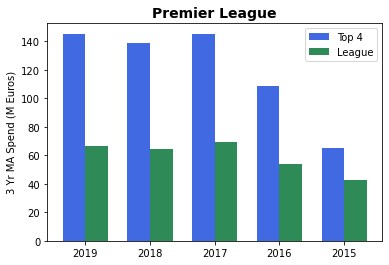

In [19]:
eng_bar = bar_compare(eng_MA,"Premier League")
eng_bar

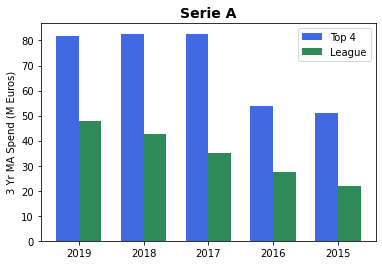

In [20]:
italy_bar = bar_compare(italy_MA,"Serie A")
italy_bar

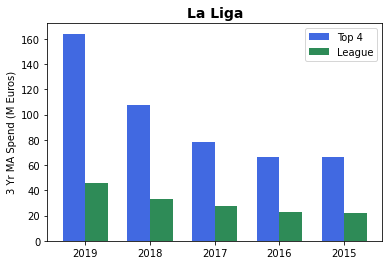

In [21]:
spain_bar = bar_compare(spain_MA,"La Liga")
spain_bar